# Project: Investigate a Dataset - No-show appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>    In these dataset **(No-show appointment)** we wil discuss about the number of patients in different cases ,for example(gender,age,...) using numpy and pandas tools.
And visualize it by histograms uses matplotlib for better understanding the dataset and make it much easier for stakeholders. 
### Question(s) for Analysis
<ul>
<li><a href="#First">First Question</a></li>  What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
<li><a href="#Second">Second Question</a></li> What is the most common disease in patients who go to their appointments? 
<li><a href="#Third">Third Question</a></li>  What is the common age and gender of patients with this disease?  
</ul>    

**Import** some libraries that help  with anlayzing.

In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
#load libraries

<a id='wrangling'></a>
## Data Wrangling

> We will start import our data and check the names and values of coulmns and dealing with null values, also deleting unimportant coulmns and dealing with un defiend values like (1,0,..).

**Import** data from **CSV** file

In [399]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv') #import data

Load **5 rows** from the data file to check for ***cleanliness*** .

In [400]:
df.head() #Load 5 rows

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


To know more about data types and null cells we use **.info** method

In [401]:
df.info() #know more about datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


To know how the strucutre of data looklike we use **.shape** method

In [402]:
df.shape #shape of the data 

(110527, 14)


### Data Cleaning
> we will start to drop null values and unimportant columns and clean the dataset.

***Start cleaning*** by deleting unimportant coulmns (**Patient Id, Appointment ID**)

In [403]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True) #drop un important columns

In [404]:
df.head(1) #show 1 row to see the changes

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


>convert **Scheduled Day** and **Appointment Day** to datetime type

In [405]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']) #convert datetype
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']) #convert datetype


>Extract the date and the time from the **scheduled Day** 

In [406]:
df['Scheduled_Time']=df['ScheduledDay'].dt.strftime('%I:%M %p') #convert time to 12 hour shape
df['ScheduledDay']=df['ScheduledDay'].dt.date #convert datetype

In [407]:
df.head(2) #show 2 rows to see the changes

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Time
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,06:38 PM
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,04:08 PM


>make a space between the words in **ScheduledDay** and **AppointmentDay**

In [408]:
df.rename(columns={"ScheduledDay":"Scheduled_Day"}, inplace=True) #rename coulmns by _ in the middle
df.rename(columns={"AppointmentDay":"Appointment_Day"}, inplace=True) #rename coulmns by _ in the middle

>convert **Scheduled_Day**  to datetime type

In [409]:
df['Scheduled_Day']=pd.to_datetime(df['Scheduled_Day']) #convert datetype

>Load 5 rows from the data file to check for **changes**

In [410]:
df.head() #Load 5 rows

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Time
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,06:38 PM
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,04:08 PM
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,04:19 PM
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,05:29 PM
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,04:07 PM


>Change **Gender** coulmn values name from (**M,F**) to (**Male,Female**).

In [411]:
df['Gender'].replace({"F":"Female","M":"Male"},inplace=True)#replace M,F to Male,Female

>Delete any **Age** value less than 0

In [412]:
df=df[df['Age']>=0] #drop any value < 0

>Change **Scholarship** coulmn values name from (**0 , 1**) to ( **Unsubscribed , Subscribed** ).

In [413]:
df['Scholarship'].replace({0:'Unsubscribed',1:"Subscribed"},inplace=True)#replace 0,1 to Unsubscribed,Subscribed

>Make **Neighbourhood** columns values as **title shape** using **.title** method

In [414]:
df['Neighbourhood']=df['Neighbourhood'].str.title() # Capitalize the first letter of the word 

>Change **SMS_received** coulmn values name from (**0,1**) to (**No , Yes**).

In [415]:
df['SMS_received'].replace({0:"No",1:"Yes"},inplace=True)#replace 0,1 to Yes, No

>change coulmn name from **N-show** to **Attend** to be more clear for better understanding.

In [416]:
df.rename(columns={"No-show":"Attend"}, inplace=True) #rename No-show to Attend

>Change **Attend coulmn** values name from (**No , Yes**) to (**✓ , X**).

In [417]:
df['Attend'].replace({"No":"✓","Yes":"X"},inplace=True) #replace No,Yes to ✓ ,X

>let's make a **While loops** that allow us to rename column values in **Hipertension,  Diabetes,  Alcoholism,  Handcap.**

In [418]:
column=['Hipertension','Diabetes','Alcoholism','Handcap'] 
i=0
while i < 4:
    df[column[i]].replace({0:"Negative",1:"Positive"},inplace=True)
    i += 1  
    #replace coulmns values 0,1 to Negative ,Positive

>let's change unimportant values from the **Handcap coulmn**

In [419]:
lista=[2,3,4]
df=df[df['Handcap'].isin(lista) == False ]
#delete 2,3,4 values from Handcap column

In [420]:
df['Handcap'].value_counts() #check for changes

Negative    108285
Positive      2042
Name: Handcap, dtype: int64

>**Let's check the changes**

In [421]:
df.head() #load Five rows

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Attend,Scheduled_Time
0,Female,2016-04-29,2016-04-29,62,Jardim Da Penha,Unsubscribed,Positive,Negative,Negative,Negative,No,✓,06:38 PM
1,Male,2016-04-29,2016-04-29,56,Jardim Da Penha,Unsubscribed,Negative,Negative,Negative,Negative,No,✓,04:08 PM
2,Female,2016-04-29,2016-04-29,62,Mata Da Praia,Unsubscribed,Negative,Negative,Negative,Negative,No,✓,04:19 PM
3,Female,2016-04-29,2016-04-29,8,Pontal De Camburi,Unsubscribed,Negative,Negative,Negative,Negative,No,✓,05:29 PM
4,Female,2016-04-29,2016-04-29,56,Jardim Da Penha,Unsubscribed,Positive,Positive,Negative,Negative,No,✓,04:07 PM


**Let's leave an aesthetic touch rearranging the columns positions**

In [422]:
df = df[['Scheduled_Day','Scheduled_Time','Appointment_Day','Gender','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','Attend']]
#change columns positions

**Let's check the changes**

In [423]:
df.head() #load Five rows to check the changes

,Scheduled_Day,Scheduled_Time,Appointment_Day,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,Attend
0,2016-04-29,06:38 PM,2016-04-29,Female,62,Jardim Da Penha,Unsubscribed,Positive,Negative,Negative,Negative,✓
1,2016-04-29,04:08 PM,2016-04-29,Male,56,Jardim Da Penha,Unsubscribed,Negative,Negative,Negative,Negative,✓
2,2016-04-29,04:19 PM,2016-04-29,Female,62,Mata Da Praia,Unsubscribed,Negative,Negative,Negative,Negative,✓
3,2016-04-29,05:29 PM,2016-04-29,Female,8,Pontal De Camburi,Unsubscribed,Negative,Negative,Negative,Negative,✓
4,2016-04-29,04:07 PM,2016-04-29,Female,56,Jardim Da Penha,Unsubscribed,Positive,Positive,Negative,Negative,✓


<a id='eda'></a>
## Exploratory Data Analysis

<a id='First'></a>
### Research Question 1 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

>let's see what patients gender who attend thier appointment 

In [424]:
Male=df.query('Gender == "Male" & Attend=="✓"') #Male who attended his appointment
Male=Male.count().mean()#average


In [425]:
Female=df.query('Gender == "Female" & Attend=="✓"') #Female who attended his appointment
Female=Female.count().mean()#average

>let's make a bar chart to see the releation between **Attendence and Gender**.

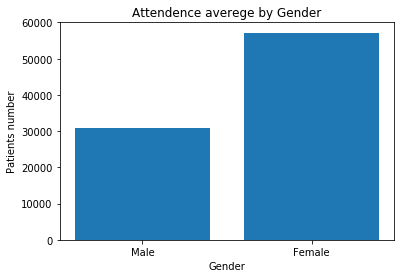

In [426]:
locations=[1,2] #locations
Genders=[Male,Female] #Sort Gender  
labels=['Male','Female']#Labels
plt.bar(locations, Genders, tick_label=labels); # make a chart using plt method
plt.title("Attendence averege by Gender");#Title of chart
plt.xlabel("Gender"); #xlabel
plt.ylabel("Patients number");#ylabel

>in this chart show that female has more attendence than male so let's make a comprison between the same relation in different ages. 

we made a another column takes **Age >= 50 to Old** and **Age < 50 to Young**.

In [455]:
conditions=[
    (df['Age'] >=50) 
    ,(df['Age'] <50)
    
]
sort =['Old =>50 Years','Young <50 Years']
df['Sort Age']=np.select(conditions,sort)   #make a new coulmn :if Age <50 = Young , Age >= 50 = Old

>Function that allow to make a chart to two different columns to prevent repetitive coding.

In [470]:
def myPercentegePlot(df,xVar,yVar,normalize=True,color=['red','green']):
    '''
    using a two difrrent coulmns name to make chart to make a comparison between them
    the first column name:xVar
    the second column name:yVar
    
    '''
    #if count a plot multiply by 1 otherwise multiply by 100
    mul=1
    if normalize:
        mul=100
    #plot
    df.groupby([xVar])[yVar].value_counts(normalize=normalize).unstack(yVar).mul(mul).plot.bar(edgecolor='black',
                                                                                              figsize=[8,7],
                                                                                              rot=0,
                                                                                              width=.8,
                                                                                              color=color );
    xVar=xVar.replace("_"," ")#replace_with space
    #add title and format it
    plt.title(f'Percentage {yVar} by {xVar}'.title(),fontsize=14,weight="bold")
    #add x label and format it
    plt.xlabel(xVar.title(),fontsize=10,weight="bold")
    #add y label and format it
    plt.ylabel('Percentage'.title(),fontsize=10,weight="bold")



>then we make a chart between **Age and Attend** using matplotlib .

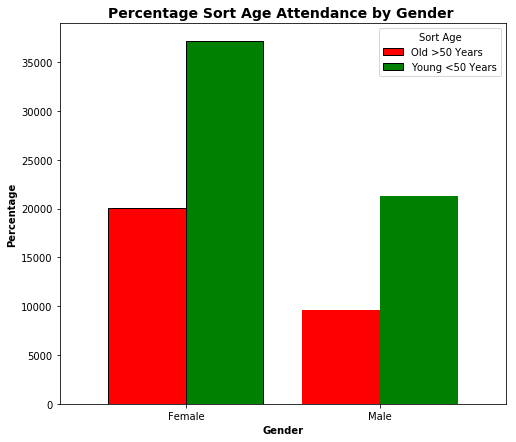

In [471]:
myPercentegePlot(df.query("Attend =='✓'"),'Gender','Sort Age',normalize=False) #call function
plt.title("Percentage Sort Age Attendance by Gender ",fontsize=14,weight="bold"); #change the title of the chart

>in this chart show that **young age** went to their appointment more than **old age**. aslo we noticed that female has a bigger attendence number than male so we can say that female has more commitment than male.

let's make another chart to see if subscribtion patients has attend number better than unsubscribtion.

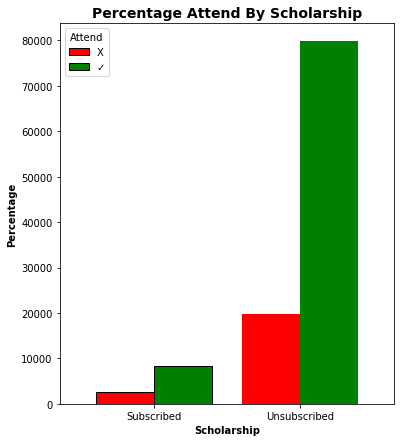

In [466]:
myPercentegePlot(df,'Scholarship','Attend',normalize=False) #call function

> In this chart shows that **Unsubscribed patients** has larger Attendence number than **Subscribed patients**.

<a id='Second'></a>
### Research Question 2  (What is the most common disease in patients who go to their appointments?)

We start to make a comparsion of attendence between the patients has diseases like (Hipertension,Diabetes,Alcoholism,Handcap) in chart.

In [301]:
d_1=df.groupby(["Hipertension"]).apply(lambda df: df.query('Attend =="✓"')).Hipertension.value_counts() 
# Hipertension patients Attendence using groupby
d_2=df.groupby(["Diabetes"]).apply(lambda df: df.query('Attend =="✓"')).Diabetes.value_counts()
# Diabetes patients Attendence using groupby
d_3=df.groupby(["Alcoholism"]).apply(lambda df: df.query('Attend =="✓"')).Alcoholism.value_counts()
# Alcoholism patients Attendence using groupby
d_4=df.groupby(["Handcap"]).apply(lambda df: df.query('Attend =="✓"')).Handcap.value_counts()
# Alcoholism patients Attendence using groupby

we use a a matplotlib to build this pie chart to compare between these diseases

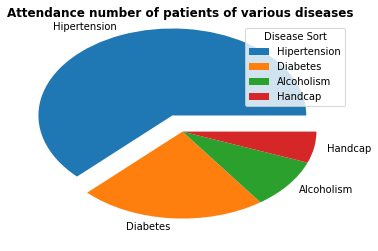

In [495]:
mlabels=['Hipertension','Diabetes','Alcoholism','Handcap']
explode =[.2,0,0,0]
d=([d_1[1],d_2[1],d_3[1],d_4[1]])
plt.pie(d,explode=explode,labels=mlabels ); # make a chart using plt method
plt.title("Attendance number of patients of various diseases ",weight='bold',fontsize=12);#Title of chart
plt.legend(title= 'Disease Sort');
plt.show();

> We see that Hipertension is the largest disease in this chart but What is the common age and gender of patients with this disease? let's answer it in the next question

<a id='Third'></a>
### Research Question 3  (What is the common age and gender of patients with this disease?)

>Let's start it by making a comparison between gender and age in Hipertension Patients.

In [496]:
young=df.groupby('Gender').apply(lambda df:df.query('Age < 50')).Hipertension.value_counts()
                                                                      # Hipertension patients <50 years Attendence using groupby
old=df.groupby('Gender').apply(lambda df:df.query('Age > 50')).Hipertension.value_counts()
                                                                      # Hipertension patients >50 years Attendence using groupby

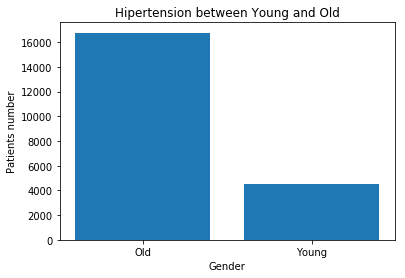

In [497]:
plt.bar(['Old','Young'],[old[1],young[1]]);# make a chart using plt method
plt.title("Hipertension between Young and Old");#Title of chart
plt.xlabel("Gender"); #xlabel
plt.ylabel("Patients number"); #ylabel

>In this chart shows that the Hipertension disease more common in old than young people.

<a id='conclusions'></a>
## Conclusions
>we started by wrangling the dataset then clean it by using numpy and pandas then using matplotlib to visualize in charts
from each analyzing process we notice that:


> The attendence change by age such as the young made a better attendence rate than old and also change by gender like female has a better attendence rate than male by age or in general.

>we also notice the attendence avrege change by subscribtion in Scholarship (Bolsa Família).we found the unsubscrided patients has a better attendence rate than subscribed patients.

>we made a analyizing about the common disease in attendence appointment we found that the the Hipertension is the most common disease so we started aother chart to see the coom gender has this disease and we found that the old patients(>50 years) mor commnley get the diesease larger than young patients (<50 years).

## Limitations

>Information about the address of patients not provided to know the distance between the hospitals and their homes.

>There is no age by month information to know the patient has 0 years what ecxactly their age by month.

In [498]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255